# Cooking posts analysis 

### Using top 3 groups

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn
seaborn.set()

In [2]:
dataset1 = pd.read_csv('dataset/cast_iron_cooking1.tsv', delimiter='\t', usecols=[1, 2, 3], header=None, names=['type', 'comments', 'data'], quoting=3)
dataset2 = pd.read_csv('dataset/classic_country_cooking1.tsv', delimiter='\t', usecols=[1, 2, 3], header=None, names=['type', 'comments', 'data'], quoting=3)
dataset3 = pd.read_csv('dataset/for_our_love_of_cooking1.tsv', delimiter='\t', usecols=[1, 2, 3], header=None, names=['type', 'comments', 'data'], quoting=3)

In [3]:
print('Total count of posts: {}\n'
      '\tCa ir co (Part 1): {}\n'
      '\tCl co co (Part 1): {}\n'
      '\tFo ou lo of co (Part 1): {}'
      .format(len(dataset1)+len(dataset2)+len(dataset3), len(dataset1), len(dataset2), len(dataset3)))

Total count of posts: 361284
	Ca ir co (Part 1): 149494
	Cl co co (Part 1): 97548
	Fo ou lo of co (Part 1): 114242


In [4]:
dataset1 = dataset1[dataset1['comments'] >= 10]
dataset2 = dataset2[dataset2['comments'] >= 10]
dataset3 = dataset3[dataset3['comments'] >= 10]

In [5]:
dataset1['type'] = dataset1['type'].fillna(value='text')
dataset2['type'] = dataset2['type'].fillna(value='text')
dataset3['type'] = dataset3['type'].fillna(value='text')

In [6]:
print('Total count of posts with >= 10 comments: {}\n'
      '\tCa ir co (Part 1): {}\n'
      '\tCl co co (Part 1): {}\n'
      '\tFo ou lo of co (Part 1): {}'
      .format(len(dataset1)+len(dataset2)+len(dataset3), len(dataset1), len(dataset2), len(dataset3)))

Total count of posts with >= 10 comments: 66188
	Ca ir co (Part 1): 29765
	Cl co co (Part 1): 23504
	Fo ou lo of co (Part 1): 12919


## Posts type analysis

In [7]:
type_data = pd.concat((dataset1['type'], dataset2['type'], dataset3['type']))

In [8]:
type_data = type_data.value_counts()

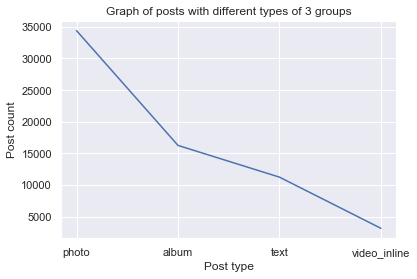

In [9]:
plt.plot(type_data[type_data > 500])
plt.title('Graph of posts with different types of 3 groups')
plt.xlabel('Post type')
plt.ylabel('Post count')
plt.show()

In [10]:
type_data

photo                      34397
album                      16250
text                       11235
video_inline                3140
group_sell_product_item      470
unavailable                  468
share                        155
new_album                     21
post                           9
note                           9
video_direct_response          8
animated_image_share           5
animated_image_video           5
map                            5
native_templates               5
image_share                    3
group                          1
avatar                         1
cover_photo                    1
Name: type, dtype: int64

## Posts data analysis

In [11]:
posts_data = pd.concat((dataset1['data'], dataset2['data'], dataset3['data']))

### Posts length

In [12]:
words_count = posts_data.apply(lambda x: len(str(x).split(' ')))

In [13]:
average_words_count = int(words_count.mean())

In [14]:
symbols_count = posts_data.apply(lambda x: len(str(x)))

In [15]:
average_symbols_count = int(symbols_count.mean())

In [16]:
count_80 = len(symbols_count[symbols_count <= 80])
count_100 = len(symbols_count[symbols_count <= 100])
count_120 = len(symbols_count[symbols_count <= 120])

In [17]:
print('Average words count: {}\n'
     'Average symbols count: {}\n'
     'Posts count with <= 80 symbols: {}\n'
     'Posts count with <= 100 symbols: {}\n'
     'Posts count with <= 120 symbols: {}\n'
     .format(average_words_count, average_symbols_count, count_80, count_100, count_120))

Average words count: 21
Average symbols count: 112
Posts count with <= 80 symbols: 33690
Posts count with <= 100 symbols: 39746
Posts count with <= 120 symbols: 44304



### Cleaning text

In [18]:
import re
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to C:\Users\Dmitry
[nltk_data]     Poliuha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Dmitry
[nltk_data]     Poliuha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
lemmatizer = WordNetLemmatizer()
corpus = []
stopwords_eng = set(stopwords.words('english'))
for item in posts_data:
    post = re.sub(r'[^a-zA-Z]', ' ', str(item))
    post = post.lower()
    post = [lemmatizer.lemmatize(word) for word in post.split(' ') if word and word not in stopwords_eng]
    post = ' '.join(post)
    corpus.append(post)

### Write words frequencies to file

In [20]:
words_frequencies = pd.Series(' '.join(corpus).split()).value_counts()
words_frequencies[words_frequencies >= 500].to_csv('words_frequencies.csv')

In [21]:
words_frequencies.head(10)

iron       7509
cast       7207
made       6686
chicken    6592
pan        5479
dinner     5275
good       5143
one        4646
potato     4608
cheese     4506
dtype: int64